In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-prediction/heart_failure_clinical_records.csv


## Installing and Importing FLAML, AutoML and Viz Libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
!pip install "flaml[automl]"

  Obtaining dependency information for flaml[automl] from https://files.pythonhosted.org/packages/e6/5e/f26990e3007c891132c7daec69059c916cc521749451cada3aae27e2f611/FLAML-2.1.1-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.2/295.2 kB 7.2 MB/s eta 0:00:00


In [4]:
pip install -U ipywidgets

  Obtaining dependency information for ipywidgets from https://files.pythonhosted.org/packages/4a/0e/57ed498fafbc60419a9332d872e929879ceba2d73cb11d284d7112472b3e/ipywidgets-8.1.1-py3-none-any.whl.metadata
  Obtaining dependency information for widgetsnbextension~=4.0.9 from https://files.pythonhosted.org/packages/29/03/107d96077c4befed191f7ad1a12c7b52a8f9d2778a5836d59f9855c105f6/widgetsnbextension-4.0.9-py3-none-any.whl.metadata
  Obtaining dependency information for jupyterlab-widgets~=3.0.9 from https://files.pythonhosted.org/packages/e8/05/0ebab152288693b5ec7b339aab857362947031143b282853b4c2dd4b5b40/jupyterlab_widgets-3.0.9-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.9/214.9 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 60.6 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.6


In [5]:
!pip install ray[tune]==2.4.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.6/58.6 MB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 64.1 MB/s eta 0:00:00
  Obtaining dependency information for platformdirs<4,>=2.4 from https://files.pythonhosted.org/packages/56/29/3ec311dc18804409ecf0d2b09caa976f3ae6215559306b5b530004e11156/platformdirs-3.11.0-py3-none-any.whl.metadata
  Attempting uninstall: platformdirs
    Found existing installation: platformdirs 4.1.0
    Uninstalling platformdirs-4.1.0:
      Successfully uninstalled platformdirs-4.1.0
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.57.0
    Uninstalling grpcio-1.57.0:
      Successfully uninstalled grpcio-1.57.0
  Attempting uninstall: ray
    Found existing installation: ray 2.6.3
    Uninstalling ray-2.6.3:
      Successfully uninstalled ray-2.6.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the followin

In [6]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from flaml import AutoML

In [7]:
automl = AutoML()

## Loading Data

In [8]:
df = pd.read_csv('/kaggle/input/heart-failure-prediction/heart_failure_clinical_records.csv')

In [9]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [10]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [11]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [12]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

## Checking Data Compatibility For PCA 

In [13]:
correlation_attributes = df.corr()
correlation_attributes

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


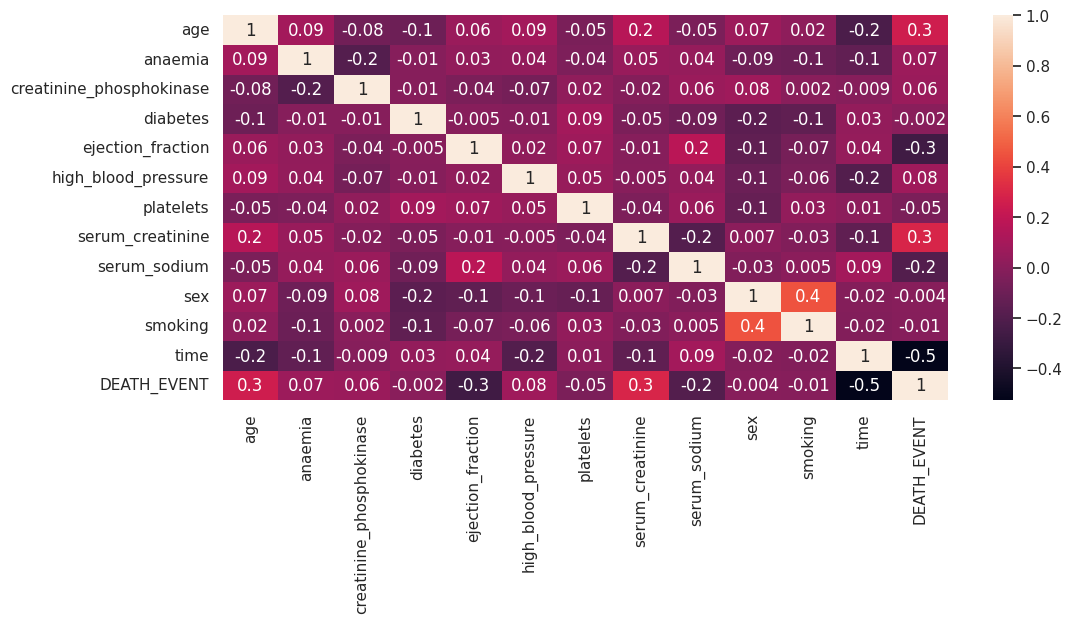

In [14]:
sns.set(rc = {'figure.figsize':(11.7,5)})
sns.heatmap(correlation_attributes,annot=True,fmt='.1g')
plt.show()

**Observation : Features are very less correlated to each other, so we can use all features for our data training as all are helping in information gain.**

## Training and Testing Data

In [15]:
x = df.drop(columns='DEATH_EVENT')
y = df['DEATH_EVENT']

In [16]:
X_train, X_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [17]:
#Customize AutoML https://microsoft.github.io/FLAML/docs/Use-Cases/Task-Oriented-AutoML/#customize-automlfit
#Total number of iterations : 200
# It run each model alternatively.
settings = {
    'time_budget':1200,
    "metric": 'accuracy', 
    "estimator_list":['rf','kneighbor'],
     "task": 'classification',  # task type
    "seed": 7654321,    # random seed
    'eval_method':'cv',
    'max_iter':200
}

In [18]:
automl.fit(X_train=X_train, y_train=y_train, **settings)

[flaml.automl.logger: 12-24 14:16:18] {1679} INFO - task = classification
[flaml.automl.logger: 12-24 14:16:18] {1690} INFO - Evaluation method: cv
[flaml.automl.logger: 12-24 14:16:18] {1788} INFO - Minimizing error metric: 1-accuracy
[flaml.automl.logger: 12-24 14:16:18] {1900} INFO - List of ML learners in AutoML Run: ['rf', 'kneighbor']
[flaml.automl.logger: 12-24 14:16:18] {2218} INFO - iteration 0, current learner rf
[flaml.automl.logger: 12-24 14:16:18] {2344} INFO - Estimated sufficient time budget=2255s. Estimated necessary time budget=4s.
[flaml.automl.logger: 12-24 14:16:18] {2391} INFO -  at 0.3s,	estimator rf's best error=0.2346,	best estimator rf's best error=0.2346
[flaml.automl.logger: 12-24 14:16:18] {2218} INFO - iteration 1, current learner rf
[flaml.automl.logger: 12-24 14:16:18] {2391} INFO -  at 0.5s,	estimator rf's best error=0.2178,	best estimator rf's best error=0.2178
[flaml.automl.logger: 12-24 14:16:18] {2218} INFO - iteration 2, current learner rf
[flaml.au

## Outcomes:

In [19]:
automl.best_estimator

'rf'

In [20]:
automl.best_config

{'n_estimators': 17,
 'max_features': 0.4472982144028823,
 'max_leaves': 5,
 'criterion': 'entropy'}

In [21]:
automl.model.estimator

RandomForestClassifier(criterion='entropy', max_features=0.4472982144028823,
                       max_leaf_nodes=5, n_estimators=17, n_jobs=-1,
                       random_state=12032022)

In [22]:
automl.model.score(X_test,y_test)

0.9166666666666666